# **Handcrafted Features - Baseline - SVM**

The following code utilizes the [pyAudioAnalysis](https://github.com/tyiannak/pyAudioAnalysis) library to extract handcrafted features from audio data and train a Support Vector Machine (SVM) model. This model serves as a baseline for comparing the performance of other models. When applied to the test set, the model achieves an accuracy of 74% and an F1 (macro) score of 72.5%.

In [1]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

project_path = '/content/drive/My Drive/GitHub/MarineMammalSoundClassification/'
%cd /content/drive/My Drive/GitHub/MarineMammalSoundClassification/

Mounted at /content/drive
/content/drive/My Drive/GitHub/MarineMammalSoundClassification


In [2]:
!pip install eyed3
!pip install pydub
# !pip install pyAudioAnalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 6.4 MB/s eta 0:00:00


In [3]:
import os
from pyAudioAnalysis import audioTrainTest as aT

In [4]:
if not os.path.exists('models/svm'):
   os.makedirs('models/svm')

In [5]:
# List all class directories in the 'train' folder
train_classes = os.listdir('data_split/train')

# Create a list of full paths to each training class directory
train_folders = ['data_split/train/' + s for s in train_classes]

# Extract features from the training folders and train an SVM model
# Parameters:
# - train_folders: List of paths to training folders
# - 1.0: Proportion of the data to be used for training
# - 1.0: Proportion of the data to be used for validation
# - aT.shortTermWindow: Short-term window size for feature extraction
# - aT.shortTermStep: Step size for short-term feature extraction
# - "svm": Type of classifier to use (Support Vector Machine in this case)
# - "svmBaseline": Name for saving the trained model
# - False: Whether to plot the training results or not
aT.extract_features_and_train(train_folders, 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "models/svm/svmBaseline", False)

Analyzing file 1 of 46: data_split/train/AtlanticSpottedDolphin/61025001.wav
Analyzing file 2 of 46: data_split/train/AtlanticSpottedDolphin/61025002.wav
Analyzing file 3 of 46: data_split/train/AtlanticSpottedDolphin/61025003.wav
Analyzing file 4 of 46: data_split/train/AtlanticSpottedDolphin/61025004.wav
Analyzing file 5 of 46: data_split/train/AtlanticSpottedDolphin/61025006.wav
Analyzing file 6 of 46: data_split/train/AtlanticSpottedDolphin/61025007.wav
Analyzing file 7 of 46: data_split/train/AtlanticSpottedDolphin/61025008.wav
Analyzing file 8 of 46: data_split/train/AtlanticSpottedDolphin/61025009.wav


/content/drive/My Drive/GitHub/MarineMammalSoundClassification/pyAudioAnalysis/audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io


Analyzing file 9 of 46: data_split/train/AtlanticSpottedDolphin/6102500A.wav
Analyzing file 10 of 46: data_split/train/AtlanticSpottedDolphin/6102500B.wav
Analyzing file 11 of 46: data_split/train/AtlanticSpottedDolphin/6102500D.wav
Analyzing file 12 of 46: data_split/train/AtlanticSpottedDolphin/6102500E.wav
Analyzing file 13 of 46: data_split/train/AtlanticSpottedDolphin/6102500F.wav
Analyzing file 14 of 46: data_split/train/AtlanticSpottedDolphin/6102500G.wav
Analyzing file 15 of 46: data_split/train/AtlanticSpottedDolphin/6102500H.wav
Analyzing file 16 of 46: data_split/train/AtlanticSpottedDolphin/6102500I.wav
Analyzing file 17 of 46: data_split/train/AtlanticSpottedDolphin/6102500J.wav
Analyzing file 18 of 46: data_split/train/AtlanticSpottedDolphin/6102500K.wav
Analyzing file 19 of 46: data_split/train/AtlanticSpottedDolphin/6102500M.wav
Analyzing file 20 of 46: data_split/train/AtlanticSpottedDolphin/6102500N.wav
Analyzing file 21 of 46: data_split/train/AtlanticSpottedDolphin/

In [6]:
# List all class directories in the 'test' folder
test_classes = os.listdir('data_split/test')

# Create a list of full paths to each testing class directory
test_folders = ['data_split/test/' + s for s in test_classes]

# Evaluate the trained SVM model on the test folders
# Parameters:
# - test_folders: List of paths to test folders
# - "svmBaseline": Name of the saved model to be loaded for evaluation
# - "svm": Type of classifier used (Support Vector Machine in this case)
# - "AtlanticSpottedDolphin": Specific class name to evaluate metrics for

# Outputs:
# - cm: Confusion matrix
# - thr_prre: Thresholds for Precision-Recall curve
# - pre: Precision values for Precision-Recall curve
# - rec: Recall values for Precision-Recall curve
# - thr_roc: Thresholds for ROC curve
# - fpr: False Positive Rates for ROC curve
# - tpr: True Positive Rates for ROC curve
cm, thr_prre, pre, rec, thr_roc, fpr, tpr = aT.evaluate_model_for_folders(test_folders, "models/svm/svmBaseline", "svm", "AtlanticSpottedDolphin")

/content/drive/My Drive/GitHub/MarineMammalSoundClassification/pyAudioAnalysis/audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io


[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  3  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  3  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  1  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  1  0]
 [ 1  0  0  0  0  0  4  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  1  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  1  1  0  0  0
   0  1  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  1  0  0  0  0  

In [31]:
# import IPython
# IPython.display.HTML(filename='temp.html')

In [32]:
import numpy as np

accuracy = np.trace(cm) / np.sum(cm)

precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)

f1_per_class = 2 * (precision * recall) / (precision + recall)
f1_per_class = np.nan_to_num(f1_per_class)
f1_macro = np.mean(f1_per_class)

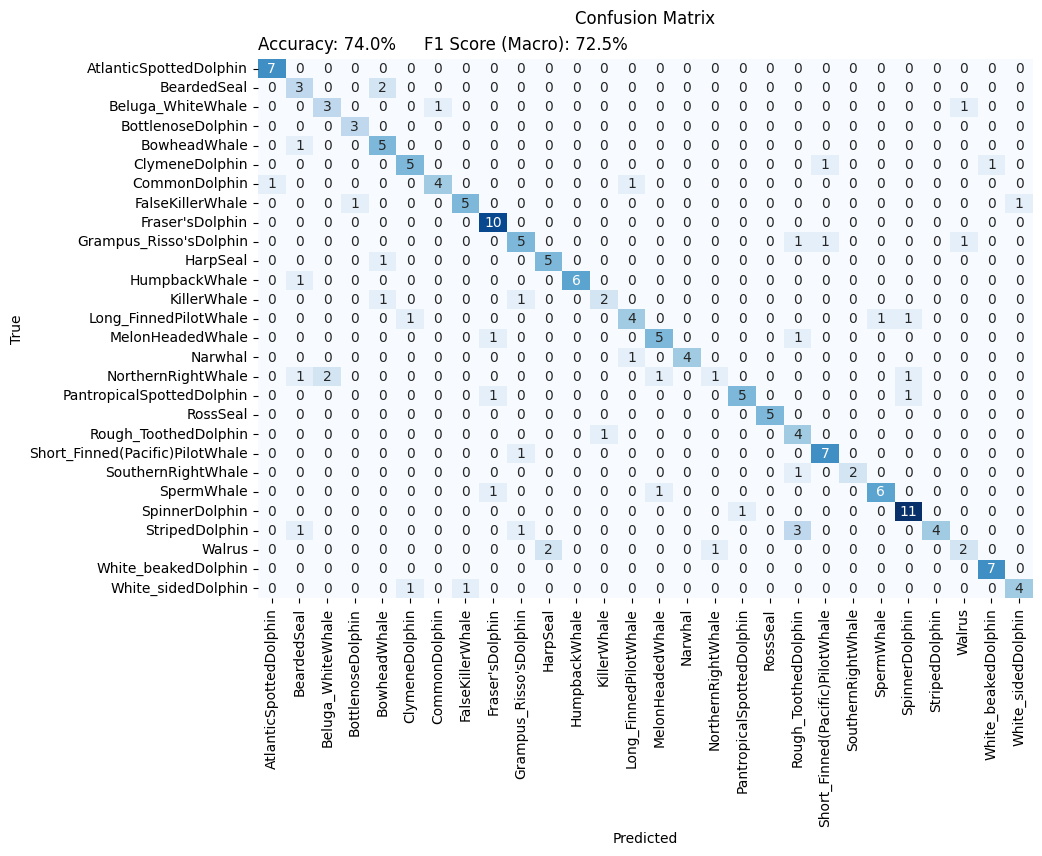

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

list_of_classes = os.listdir('data_split/test')

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=list_of_classes,
            yticklabels=list_of_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', y=1.05)

# Add accuracy and F1 score
plt.text(0, -0.5, f'Accuracy: {accuracy*100:.1f}%', fontsize=12)
plt.text(6, -0.5, f'F1 Score (Macro): {f1_macro*100:.1f}%', fontsize=12)

plt.show()